<a href="https://colab.research.google.com/github/onkar201988/google_colab_tutorials/blob/main/Behavioural_Cloning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/onkar201988/Track

Cloning into 'Track'...
remote: Enumerating objects: 15010, done.
remote: Total 15010 (delta 0), reused 0 (delta 0), pack-reused 15010 (from 1)
Receiving objects: 100% (15010/15010), 217.49 MiB | 19.36 MiB/s, done.
Updating files: 100% (15007/15007), done.


In [2]:
!ls Track/

driving_log.csv  IMG


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
import pandas as pd #to load data from .csv
import random
import os
import ntpath
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2

In [4]:
datadir = 'Track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names= columns)
pd.set_option('display.max_colwidth', 1)

data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\center_2025_06_25_15_01_40_576.jpg,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\left_2025_06_25_15_01_40_576.jpg,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\right_2025_06_25_15_01_40_576.jpg,0.0,0.0,0.0,0.000079
1,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\center_2025_06_25_15_01_40_676.jpg,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\left_2025_06_25_15_01_40_676.jpg,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\right_2025_06_25_15_01_40_676.jpg,0.0,0.0,0.0,0.000079
2,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\center_2025_06_25_15_01_40_782.jpg,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\left_2025_06_25_15_01_40_782.jpg,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\right_2025_06_25_15_01_40_782.jpg,0.0,0.0,0.0,0.000078
3,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\center_2025_06_25_15_01_40_885.jpg,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\left_2025_06_25_15_01_40_885.jpg,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\right_2025_06_25_15_01_40_885.jpg,0.0,0.0,0.0,0.000078
4,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\center_2025_06_25_15_01_40_991.jpg,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\left_2025_06_25_15_01_40_991.jpg,C:\Users\guo1ply\Documents\Onkar Data\The_Complete_Self-Driving_Car_Course-Applied_Deep_Learning_coursework\simulator-windows-64\data\IMG\right_2025_06_25_15_01_40_991.jpg,0.0,0.0,0.0,0.000078


In [5]:
def path_leaf(path):
  head, tail = ntpath.split(path) #split the file path and only take file name as tail
  return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2025_06_25_15_01_40_576.jpg,left_2025_06_25_15_01_40_576.jpg,right_2025_06_25_15_01_40_576.jpg,0.0,0.0,0.0,0.000079
1,center_2025_06_25_15_01_40_676.jpg,left_2025_06_25_15_01_40_676.jpg,right_2025_06_25_15_01_40_676.jpg,0.0,0.0,0.0,0.000079
2,center_2025_06_25_15_01_40_782.jpg,left_2025_06_25_15_01_40_782.jpg,right_2025_06_25_15_01_40_782.jpg,0.0,0.0,0.0,0.000078
3,center_2025_06_25_15_01_40_885.jpg,left_2025_06_25_15_01_40_885.jpg,right_2025_06_25_15_01_40_885.jpg,0.0,0.0,0.0,0.000078
4,center_2025_06_25_15_01_40_991.jpg,left_2025_06_25_15_01_40_991.jpg,right_2025_06_25_15_01_40_991.jpg,0.0,0.0,0.0,0.000078


[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]
[-0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24 -0.16 -0.08
  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72  0.8   0.88
  0.96]


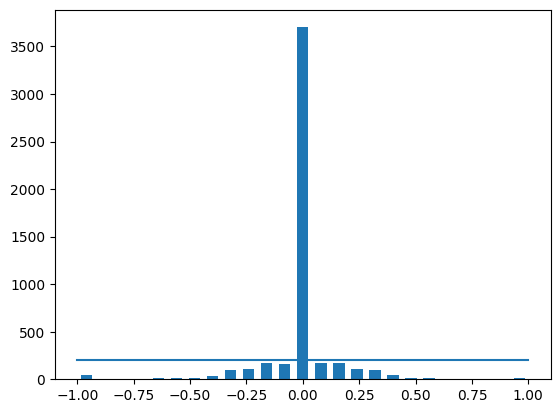

In [6]:
num_bins = 25
samples_per_bin = 200
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) *0.5 # center was not at 0, and shape is 26, which does not have a center. So add shifted array and devide by 2
print(bins)
print(center)
# the histogram shows how many dataset available for each angle.
# We have more data for angle = 0. Also we have data for both left and right
# but the problem is, since we have lot of 0 angle data, out model will be biased to straigh drive, and will not turn on sharp turn
# So we will ignore 0 data, by selecting few samples
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

Total data: 5002
removed: 3501
remaining: 1501


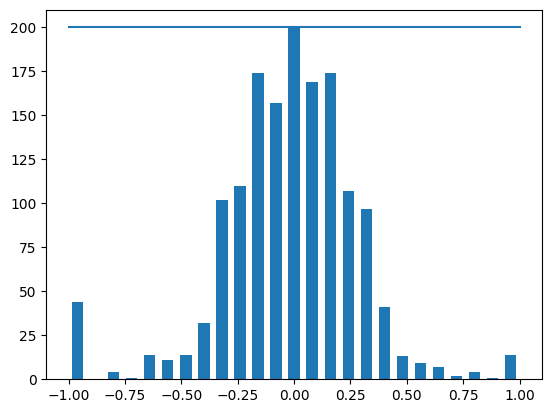

In [7]:
print('Total data:', len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i) #append the index, not the value
  # now we have gone through all the steering angles from a single bin,
  # lets shuffle the data before we remove the extra samples, so that if the samples in one bin are more than 200, and we cut remaining samples directly,
  # we will loose only the last driving samples and we will not have any more data from last part of the track, so we will shuffle and cut it
  list_ = shuffle(list_)  # 1st shuffle the samples in jth bin
  list_ = list_[samples_per_bin:] # to keep samples from 0 to samples_per_bin, select samples_per_bin to last in the list_
  remove_list.extend(list_) # append the indicese of the samples to 'Remove' in the remove_list

print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

hist, _ = np.histogram(data['steering'], num_bins)
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [8]:
print(data.iloc[1])
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i] #it returns the data at one index
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip())) #this will create the path by joining the datadir and image name, strip function will strip the spaces if any
    steering.append(float(indexed_data[3]))
  image_path = np.asarray(image_path)
  steering = np.asarray(steering)
  return image_path, steering

image_path, steering = load_img_steering(datadir + '/IMG', data) #while calling the function we will add /IMG since datadir points where IMG folder is

center      center_2025_06_25_15_01_41_608.jpg
left        left_2025_06_25_15_01_41_608.jpg  
right       right_2025_06_25_15_01_41_608.jpg 
steering   -0.383744                          
throttle    0.994135                          
reverse     0.0                               
speed       2.161357                          
Name: 10, dtype: object


/tmp/ipython-input-8-1846246658.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
/tmp/ipython-input-8-1846246658.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steering.append(float(indexed_data[3]))


In [9]:
# using split, we will split the data into training and validation data
X_train, X_valid, y_train, y_valid = train_test_split(image_path, steering, test_size=0.2, random_state=6)
print('training samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

training samples: 1200
Valid Samples: 301


Text(0.5, 1.0, 'Validation set')

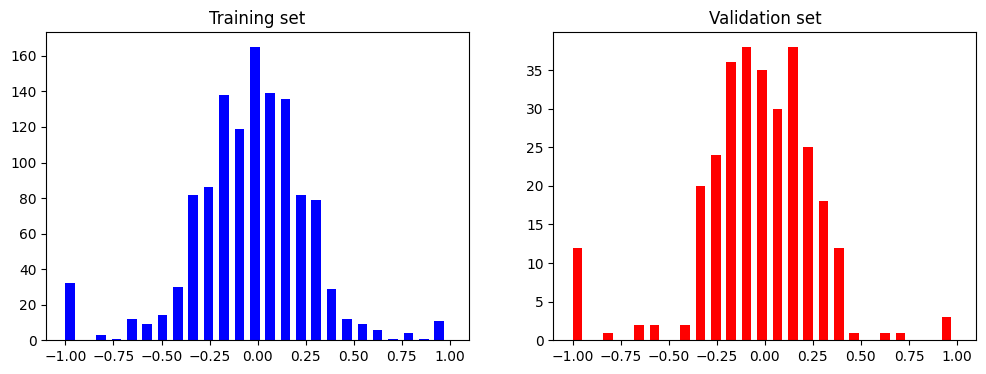

In [10]:
# let's plot the histogram of training and validation data, to verify the split is similar
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].hist(y_train, bins= num_bins, width=0.05, color='blue')
axis[0].set_title('Training set')
axis[1].hist(y_valid, bins= num_bins, width=0.05, color='red')
axis[1].set_title('Validation set')


In [11]:
def image_preprocess(img):
  image = mpimg.imread(img)
  #we will crop the image in height, we don't need the car hood and scene above the road. We plotted the image in bellow cell to visualize and decide where to crop.
  image = image[65:135, :, :] # image has height, width and depth(RGB). So we only change the height part
  image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)  #suggested by Nvidea model
  image = cv2.GaussianBlur(image, (3, 3), 0)
  image = cv2.resize(image, (200, 66))  #suggested by Nvidea model, which we will train eventually
  image = image/255 #normalization, changing values from 0-255 to 0.0 - 1.0
  return image

Text(0.5, 1.0, 'preprocessed_image')

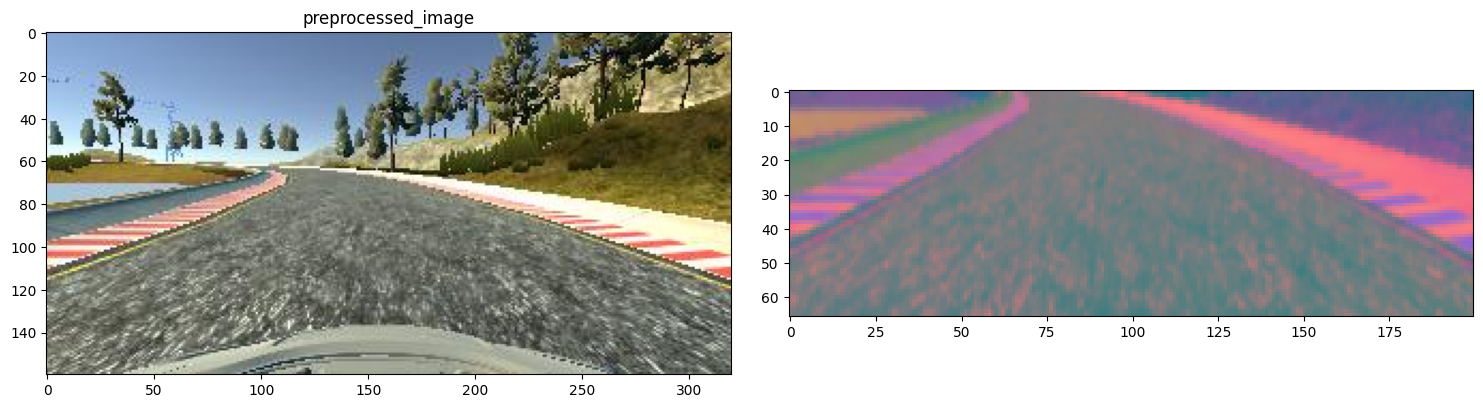

In [12]:
image = image_path[100]
original_image = mpimg.imread(image)
preprocessed_image = image_preprocess(image)

fig, axis = plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()
axis[0].imshow(original_image)
axis[0].set_title('original_image')
axis[1].imshow(preprocessed_image)
axis[0].set_title('preprocessed_image')

In [13]:
X_train = np.array(list(map(image_preprocess, X_train))) #function map will return list, so store in list, later convert it to array
X_valid = np.array(list(map(image_preprocess, X_valid)))

(1200, 66, 200, 3)


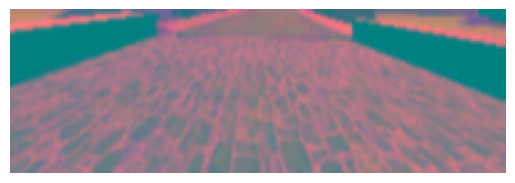

In [14]:
plt.imshow(X_train[random.randint(0, len(X_train)-1)])
plt.axis('off')
print(X_train.shape) #shape has 1200 images, 66 height, 200 width, 3 channels

In [23]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24, kernel_size=(5, 5), strides=(2,2), input_shape=(66,200,3), activation='elu'))
  model.add(Convolution2D(36, kernel_size=(5, 5), strides=(2,2), activation='elu'))
  model.add(Convolution2D(48, kernel_size=(5, 5), strides=(2,2), activation='elu'))
  model.add(Convolution2D(64, kernel_size=(3, 3), activation='elu'))
  model.add(Convolution2D(64, kernel_size=(3, 3), activation='elu'))
  model.add(Dropout(0.5))

  model.add(Flatten())

  model.add(Dense(100, activation='elu'))
  model.add(Dropout(0.5))
  model.add(Dense(50, activation='elu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='elu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  model.compile(loss = 'mse', optimizer = Adam(learning_rate=1e-3))

  return model

In [24]:
model = nvidia_model()
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 31, 98, 24)     │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 47, 36)     │        21,636 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 5, 22, 48)      │        43,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 3, 20, 64)      │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 1, 18, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1, 18, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │       115,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,219 (985.23 KB)

 Trainable params: 252,219 (985.23 KB)

 Non-trainable params: 0 (0.00 B)

None


In [25]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=100, verbose=True, shuffle=True)

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - loss: 2.1977 - val_loss: 0.6738
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.6577 - val_loss: 0.0990
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2095 - val_loss: 0.0961
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1552 - val_loss: 0.0924
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1323 - val_loss: 0.0881
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1133 - val_loss: 0.0876
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1114 - val_loss: 0.0859
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1002 - val_loss: 0.0838
Epoch 9/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1104 - val_loss: 0.0830
Epoch 10/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0969 - val_loss: 0.0825
Epoch 11/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1166 - val_loss: 0.0820
Epoch 12/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.

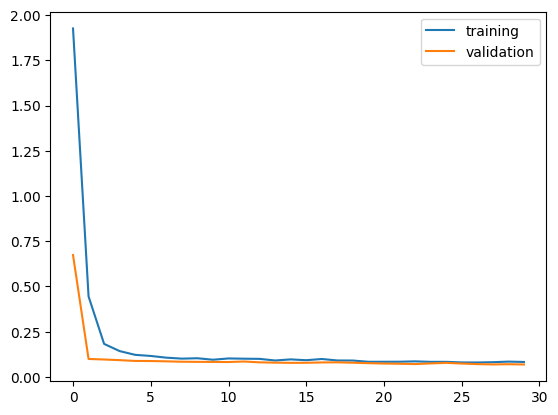

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])


In [27]:
model.save('model.h5')

In [28]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>